In [28]:
# To determine which version you're using:
!pip show tensorflow

# For the latest nightly build:
# !pip install tf-nightly
# For the current version: 
#!pip install --upgrade tensorflow

# For a specific version:
#!pip install tensorflow==1.2


Name: tensorflow
Version: 2.2.0rc3
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, opt-einsum, protobuf, gast, tensorboard, six, wrapt, google-pasta, grpcio, scipy, wheel, absl-py, keras-preprocessing, h5py, termcolor, astunparse, tensorflow-estimator
Required-by: fancyimpute


# Import


In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import random
import math

import numpy as np
from PIL import Image
import os
import cv2

from skimage.util import random_noise

In [0]:
# Create an Image with the defined Height and Width
def createImage():
  ArrayZiel = []
  for y in range(0, IMG_Height):
    tempArray = []
    for x in range(0, IMG_Width):
      tempArray.append(0)
    ArrayZiel.append(np.array(tempArray))
  return np.array(ArrayZiel)


In [0]:
# Add Noise to given Image
def add_gaussian_noise(img):
    mean = 0
    var = 10
    sigma = var ** 0.5
    gaussian = np.random.normal(mean, sigma, (IMG_Height, IMG_Width))

    noisy_image = np.zeros(img.shape, np.float32)

    if len(img.shape) == 2:
        noisy_image = img + gaussian
    else:
        noisy_image[:, :, 0] = img[:, :, 0] + gaussian
        noisy_image[:, :, 1] = img[:, :, 1] + gaussian
        noisy_image[:, :, 2] = img[:, :, 2] + gaussian

    cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
    noisy_image = noisy_image.astype(np.uint8)

    return noisy_image


In [0]:
# nimmt das Image und fügt eine MehrDimensionale Tabelle ein.
def addTabel_Mehrdimensional(image):
  x1 = int(random.randint(0, IMG_Height-30))
  x2 = int(random.randint(x1+20, IMG_Height-2))

  y1 = int(random.randint(0, IMG_Width-30))
  y2 = int(random.randint(y1+10, IMG_Width-2))

  width = x2-x1
  height = y2-y1

  AnzahlTabellen = random.randint(2,5)

  # Berechne Tabelle:
  b = int(width / AnzahlTabellen)

  for x in range(x1,x2):
    for y in range(y1, y2):
      Temp = math.sin((y / b) * 2 * math.pi)
      if(Temp > 0):
        image[x][y] = 50
      else:
        image[x][y] = 20

  return image, x1, y1, x2, y2


# nimmt das Image und fügt eine einDimensionale Tabelle ein.
def addTabel_EinDimensional(image):
  x1 = int(random.randint(0, IMG_Width-22))
  x2 = int(random.randint(x1+20, IMG_Width-2))

  width = x2-x1

  AnzahlTabellen = random.randint(2,5)

  # Berechne Tabelle:
  b = int(width / AnzahlTabellen)

  for x in range(x1,x2):
    y = 0
    Temp = math.sin(((x-x1) / b) * 2 * math.pi)
    if(Temp > 0):
      image[y][x] = 100
    else:
      image[y][x] = 0

  return image, x1, x2

In [0]:
def CreateLabelData_EinDimensional(x1, x2):
  Array = []

  Array.append(x1)
  Array.append(x2)
  return Array


def CreateLabelData_MehrDimensional(x1, y1, x2, y2):
  Array = []

  Array1 = []
  Array1.append(x1)
  Array1.append(y1)
  Array1 = np.asarray(Array1)
  Array.append(Array1)

  Array1 = []
  Array1.append(x2)
  Array1.append(y2)
  Array1 = np.asarray(Array1)
  Array.append(Array1)

  Array = np.asarray(Array)
  return Array

In [0]:
# Baue noch einen Callback ein, damit das Training (hoffentlich) weniger Zeit in anspruch nimmt
# Soll bei einer festgelegten Loss das Training unterbrechen

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get('loss') < LossZumAbbruchDesTrainings:
      print("\n Low loss so cancelling the training")
      self.model.stop_training = True

# Erster Test: Ein Dimensional


In [0]:
# Variablen

IMG_Height = 1
IMG_Width = 64

AnzahlAnTrainDaten = 1000
AnzahlAnTestDaten = 1000
DropoutRate = 0.5

LossZumAbbruchDesTrainings = 0.7

## 1) Daten Erzeugen

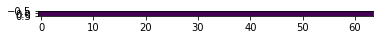

In [35]:
# Bild Erzeuger
image = createImage()

plt.imshow(image)
plt.show()

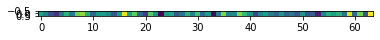

In [36]:
image = add_gaussian_noise(image)


plt.imshow(image)
plt.show()

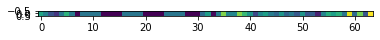

7-----31


In [37]:
# add Table
image, x1,x2 = addTabel_EinDimensional(image)

plt.imshow(image)
plt.show()

print(str(x1) + '-----' + str(x2))

In [0]:
TrainDataset = []
TrainLabelSet = []

TestDataSet = []
TestLabelSet = []

In [0]:
# Erstellen der Train Daten
for i in range(0, AnzahlAnTrainDaten):
  image = createImage()
  # image = add_gaussian_noise(image)
  image, x1, x2 = addTabel_EinDimensional(image)
  labelArray = CreateLabelData_EinDimensional(x1, x2)
  TrainDataset.append(np.asarray(image))
  TrainLabelSet.append(np.asarray(labelArray))

In [0]:
# Erstellen der TestDaten
for i in range(0, AnzahlAnTestDaten):
  image = createImage()
  # image = add_gaussian_noise(image)
  image, x1, x2 = addTabel_EinDimensional(image)
  labelArray = CreateLabelData_EinDimensional(x1, x2)
  TestDataSet.append(np.asarray(image))
  TestLabelSet.append(np.asarray(labelArray))

In [41]:
TrainDataset = np.asarray(TrainDataset, dtype=np.float32)
TrainLabelSet = np.asarray(TrainLabelSet, dtype=np.float32)
print(TrainDataset.shape)

TestDataSet = np.asarray(TestDataSet, dtype=np.float32)
TestLabelSet = np.asarray(TestLabelSet, dtype=np.float32)
print(TestDataSet.shape)

(1000, 1, 64)
(1000, 1, 64)


In [0]:
input = keras.layers.Input((IMG_Height, IMG_Width, 1))

S1 = keras.layers.Flatten()(input)
S2 = keras.layers.Dense(IMG_Width, activation='softmax')(S1)

S2 = keras.layers.Dense(IMG_Width, activation='relu')(S2)


Output = keras.layers.Dense(2, activation = 'relu')(S2)

model = keras.models.Model(input, Output)

In [0]:
model.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])



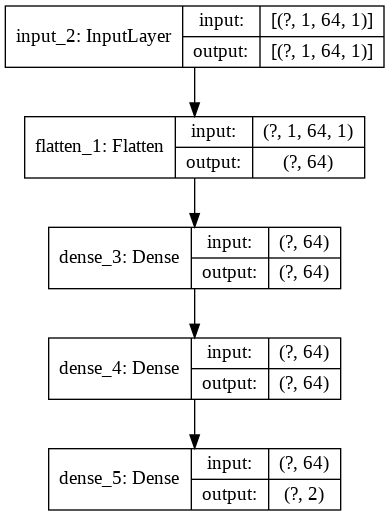

In [44]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [49]:
callbacks = myCallback()

model.fit(x = TrainDataset, y = TrainLabelSet, shuffle=True, batch_size=10,epochs=30, validation_split=0.3, callbacks = [callbacks])     

Epoch 1/30
70/70 [==============================] - 0s 2ms/step - loss: -534.2789 - accuracy: 0.6486 - val_loss: -521.5983 - val_accuracy: 0.6533
Epoch 2/30
70/70 [==============================] - 0s 2ms/step - loss: -534.2787 - accuracy: 0.6486 - val_loss: -521.5983 - val_accuracy: 0.6533
Epoch 3/30
70/70 [==============================] - 0s 2ms/step - loss: -534.2789 - accuracy: 0.6486 - val_loss: -521.5983 - val_accuracy: 0.6533
Epoch 4/30
70/70 [==============================] - 0s 2ms/step - loss: -534.2788 - accuracy: 0.6486 - val_loss: -521.5983 - val_accuracy: 0.6533
Epoch 5/30
70/70 [==============================] - 0s 2ms/step - loss: -534.2789 - accuracy: 0.6486 - val_loss: -521.5983 - val_accuracy: 0.6533
Epoch 6/30
70/70 [==============================] - 0s 2ms/step - loss: -534.2787 - accuracy: 0.6486 - val_loss: -521.5983 - val_accuracy: 0.6533
Epoch 7/30
70/70 [==============================] - 0s 2ms/step - loss: -534.2789 - accuracy: 0.6486 - val_loss: -521.5983 -

In [50]:
loss, acc = model.evaluate(TestDataSet, TestLabelSet, verbose=2)

print(acc)

32/32 - 0s - loss: -5.3501e+02 - accuracy: 0.6380
0.6380000114440918


In [51]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 64, 1)]        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 8,450
Trainable params: 8,450
Non-trainable params: 0
_________________________________________________________________


(1, 1, 64)
(1, 2)


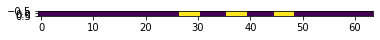

[26, 53]
[1.5786343 1.6263463]


In [54]:
image = createImage()
# image = add_gaussian_noise(image)
newImage, x1, x2 = addTabel_EinDimensional(image)
labelArray = CreateLabelData_EinDimensional(x1, x2)

Array = []
Array.append(newImage)

newImage = np.asarray(Array, dtype=np.float32)
print(newImage.shape)

prediction = model.predict(newImage)
prediction = np.asarray(prediction, dtype=np.float32)

print(prediction.shape)

plt.imshow(newImage[0])
plt.show()

print(labelArray)
print(prediction[0])
